In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/tmp/ipykernel_4757/2756096847.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('players_22.csv')
# df.isnull().sum()
# len(df.keys())

df = df[['short_name','overall','potential','value_eur']]
df

/tmp/ipykernel_4757/3403484139.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


,short_name,overall,potential,value_eur
0,L. Messi,93,93,78000000.0
1,R. Lewandowski,92,92,119500000.0
2,Cristiano Ronaldo,91,91,45000000.0
3,Neymar Jr,91,91,129000000.0
4,K. De Bruyne,91,91,125500000.0
...,...,...,...,...
19234,Song Defu,47,52,70000.0
19235,C. Porter,47,59,110000.0
19236,N. Logue,47,55,100000.0
19237,L. Rudden,47,60,110000.0


In [3]:
df.isnull().sum()

short_name     0
overall        0
potential      0
value_eur     74
dtype: int64

In [4]:
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

short_name    0
overall       0
potential     0
value_eur     0
dtype: int64

Text(0, 0.5, 'Value in Euro')

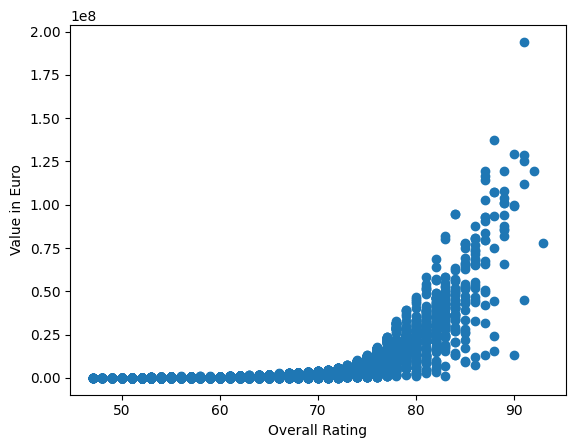

In [5]:
plt.scatter(df['overall'],df['value_eur'])
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euro')


In [6]:
scaler = MinMaxScaler()

scaler.fit(df[['value_eur']])
df['value_eur'] = scaler.transform(df[['value_eur']])

scaler.fit(df[['overall']])
df['overall'] = scaler.transform(df[['overall']])

scaler.fit(df[['potential']])
df['potential'] = scaler.transform(df[['potential']])


In [7]:
df

,short_name,overall,potential,value_eur
0,L. Messi,1.000000,0.956522,0.402034
1,R. Lewandowski,0.978261,0.934783,0.615962
2,Cristiano Ronaldo,0.956522,0.913043,0.231923
3,Neymar Jr,0.956522,0.913043,0.664933
4,K. De Bruyne,0.956522,0.913043,0.646891
...,...,...,...,...
19234,Song Defu,0.000000,0.065217,0.000314
19235,C. Porter,0.000000,0.217391,0.000521
19236,N. Logue,0.000000,0.130435,0.000469
19237,L. Rudden,0.000000,0.239130,0.000521


In [8]:

km = KMeans(n_clusters=3)
prediction = km.fit_predict(df[['overall','value_eur','potential']])
prediction

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [9]:
df['cluster'] = prediction
df

,short_name,overall,potential,value_eur,cluster
0,L. Messi,1.000000,0.956522,0.402034,1
1,R. Lewandowski,0.978261,0.934783,0.615962,1
2,Cristiano Ronaldo,0.956522,0.913043,0.231923,1
3,Neymar Jr,0.956522,0.913043,0.664933,1
4,K. De Bruyne,0.956522,0.913043,0.646891,1
...,...,...,...,...,...
19234,Song Defu,0.000000,0.065217,0.000314,2
19235,C. Porter,0.000000,0.217391,0.000521,2
19236,N. Logue,0.000000,0.130435,0.000469,2
19237,L. Rudden,0.000000,0.239130,0.000521,2


In [18]:
cluster_names = {
    0:'cluster 1',
    1:'cluster 2',
    2:'cluster 3',
    3:'cluster 4'
}
df['Cluster_Name'] = df['cluster'].map(cluster_names)
df

,short_name,overall,potential,value_eur,cluster,Cluster_Name
0,L. Messi,1.000000,0.956522,0.402034,1,cluster 2
1,R. Lewandowski,0.978261,0.934783,0.615962,1,cluster 2
2,Cristiano Ronaldo,0.956522,0.913043,0.231923,1,cluster 2
3,Neymar Jr,0.956522,0.913043,0.664933,1,cluster 2
4,K. De Bruyne,0.956522,0.913043,0.646891,1,cluster 2
...,...,...,...,...,...,...
19234,Song Defu,0.000000,0.065217,0.000314,2,cluster 3
19235,C. Porter,0.000000,0.217391,0.000521,2,cluster 3
19236,N. Logue,0.000000,0.130435,0.000469,2,cluster 3
19237,L. Rudden,0.000000,0.239130,0.000521,2,cluster 3


In [10]:
km.cluster_centers_

array([[0.40293029, 0.00537796, 0.46468278],
       [0.58482422, 0.0439435 , 0.62684806],
       [0.22694666, 0.00158862, 0.35185013]])

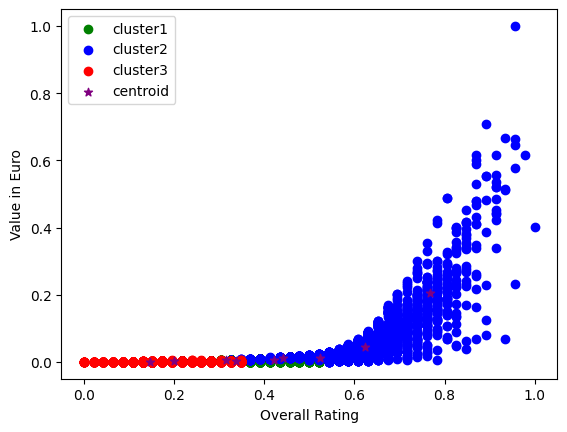

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.overall,df1['value_eur'],color='green',label='cluster1')
plt.scatter(df2.overall,df2['value_eur'],color='blue',label='cluster2')
plt.scatter(df3.overall,df3['value_eur'],color='red',label='cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euro')
plt.legend()

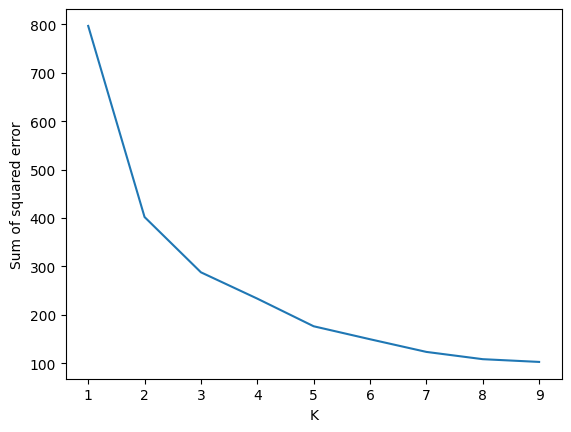

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['overall','value_eur','potential']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)